<a href="https://colab.research.google.com/github/vaibhavvesmaker/DataScience_CCC/blob/main/Enhanced_Project_Proposal_Enhancing_Auto_Insurance_Claim_Processing_Using_Advanced_Data_Science_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Technical Report

### Project: Auto Insurance Claims Dataset Analysis and Machine Learning Integration

#### 1. Introduction
This project integrates advanced machine learning frameworks (PyTorch, TensorFlow, scikit-learn) with Natural Language Processing (NLP) techniques, data exploration, visualization, and AWS cloud services. The objective is to analyze a simulated dataset of auto insurance claims, develop predictive models, perform sentiment analysis on incident descriptions, and leverage AWS for scalable analytics and deployment.

#### 2. Dataset Description
The dataset includes:
- **claim_id**: Unique identifier for each claim.
- **policy_id**: Identifier for the insurance policy associated with the claim.
- **vehicle_make**: Make of the insured vehicle.
- **vehicle_model**: Model of the insured vehicle.
- **vehicle_age**: Age of the insured vehicle in years.
- **driver_age**: Age of the driver at the time of the incident.
- **annual_mileage**: Estimated annual mileage for the insured vehicle.
- **incident_type**: Type of incident leading to the claim (e.g., Collision, Theft, Vandalism).
- **claim_amount**: Amount claimed for insurance.
- **fraudulent_claim**: Boolean indicating whether the claim is flagged as fraudulent.
- **incident_description**: Textual description of the incident (for NLP analysis).

#### 3. Project Components

##### Data Exploration and Visualization
- **Summary Statistics**: Provides an overview of numerical features.
- **Distributions**: Histograms and count plots for numerical and categorical variables.

##### Natural Language Processing (NLP)
- **Text Preprocessing**: Cleaning and tokenization of incident descriptions.
- **Sentiment Analysis**: Analyzing sentiments expressed in incident descriptions.
- **Topic Modeling**: Identifying common topics/themes from incident descriptions using techniques like LDA (Latent Dirichlet Allocation).

##### Machine Learning with PyTorch and TensorFlow
- **Predictive Modeling**: Developing models to predict claim amounts or detect fraudulent claims.
- **Model Training and Evaluation**: Using PyTorch and TensorFlow for model development, training, and evaluation.

##### AWS Integration
- **AWS S3**: Storage of dataset, model artifacts, and NLP processed data.
- **AWS SageMaker**: Utilization for scalable model training and deployment.
- **AWS Lambda**: Deployment of NLP models for real-time inference.

#### 4. Insights and Observations
- **Data Patterns**: Discovering patterns in age, mileage, and claim amounts.
- **Fraud Detection**: Identifying indicators of fraudulent claims.
- **NLP Findings**: Extracting themes and sentiments from incident descriptions.

#### 5. Conclusion
This project demonstrates a holistic approach to analyzing auto insurance claims dataset using machine learning frameworks, NLP techniques, and leveraging AWS for scalable analytics and deployment. The integration of these advanced technologies enhances decision-making capabilities and operational efficiency in insurance claim processing.

#### 6. Future Directions
- **Enhanced NLP Techniques**: Implement state-of-the-art NLP models (e.g., BERT) for deeper text analysis.
- **Real-time Analytics**: Develop real-time dashboards or APIs for monitoring and predictive insights.
- **Cloud Optimization**: Optimize AWS services for cost-efficiency and scalability in production environments.

---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameters for generating dummy data
np.random.seed(0)
num_records = 10000

# Generate dummy data for auto insurance claims
claim_data = {
    'claim_id': np.arange(num_records) + 1,
    'policy_id': np.random.randint(1000, 2000, size=num_records),  # Policy IDs
    'vehicle_make': np.random.choice(['Toyota', 'Honda', 'Ford', 'Chevrolet', 'Nissan'], size=num_records),  # Vehicle makes
    'vehicle_model': np.random.choice(['Camry', 'Accord', 'F-150', 'Silverado', 'Altima'], size=num_records),  # Vehicle models
    'vehicle_age': np.random.randint(1, 15, size=num_records),  # Vehicle age in years
    'driver_age': np.random.randint(20, 80, size=num_records),  # Driver age in years
    'annual_mileage': np.random.randint(5000, 30000, size=num_records),  # Annual mileage
    'incident_type': np.random.choice(['Collision', 'Theft', 'Vandalism'], size=num_records),  # Type of incident
    'claim_amount': np.random.normal(5000, 1500, size=num_records),  # Claim amount
    'fraudulent_claim': np.random.choice([True, False], size=num_records, p=[0.1, 0.9])  # Simulated fraud indicator
}

# Create DataFrame
claim_df = pd.DataFrame(claim_data)

# Preview the data
print(claim_df.head())


   claim_id  policy_id vehicle_make vehicle_model  vehicle_age  driver_age  \
0         1       1684         Ford         Camry           10          46   
1         2       1559        Honda        Accord           11          45   
2         3       1629    Chevrolet         F-150           12          28   
3         4       1192         Ford         Camry           12          23   
4         5       1835    Chevrolet         F-150            6          49   

   annual_mileage incident_type  claim_amount  fraudulent_claim  
0           16288     Vandalism   5552.810460             False  
1           15916         Theft   6522.375697             False  
2            6748     Vandalism   4354.286127             False  
3           24619     Vandalism   6127.371362             False  
4           28990     Collision   4955.851289             False  


          claim_id     policy_id   vehicle_age    driver_age  annual_mileage  \
count  10000.00000  10000.000000  10000.000000  10000.000000    10000.000000   
mean    5000.50000   1497.378600      7.520900     49.626100    17511.368100   
std     2886.89568    287.764039      4.034698     17.259551     7198.526961   
min        1.00000   1000.000000      1.000000     20.000000     5000.000000   
25%     2500.75000   1250.000000      4.000000     35.000000    11285.750000   
50%     5000.50000   1494.000000      8.000000     50.000000    17509.500000   
75%     7500.25000   1749.000000     11.000000     65.000000    23728.500000   
max    10000.00000   1999.000000     14.000000     79.000000    29996.000000   

       claim_amount  
count  10000.000000  
mean    5007.600305  
std     1485.523509  
min     -952.473741  
25%     3993.030270  
50%     5005.127425  
75%     5998.929754  
max    10614.899570  


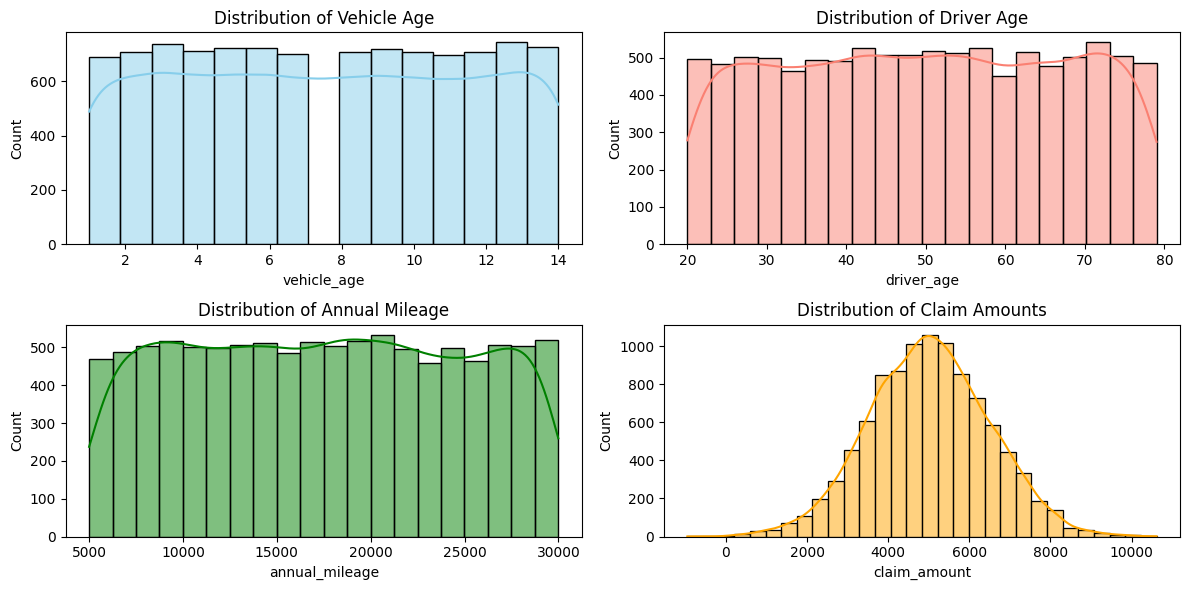

<ipython-input-4-638f775d21b9>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='incident_type', data=claim_df, palette='Set3')


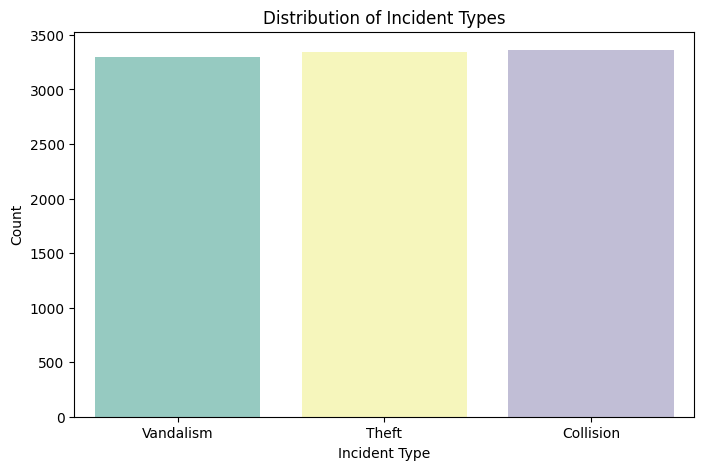

<ipython-input-4-638f775d21b9>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraudulent_claim', data=claim_df, palette='pastel')


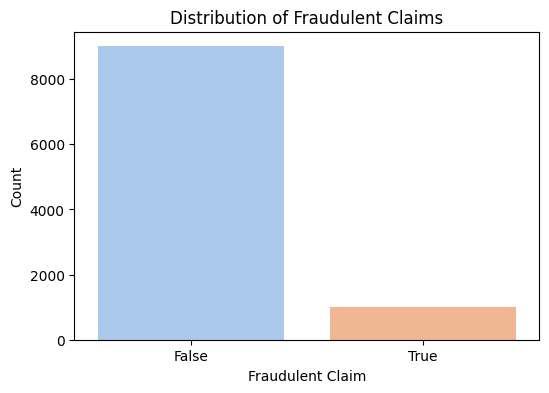

In [4]:
# Summary statistics
print(claim_df.describe())

# Distribution of numerical variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(claim_df['vehicle_age'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Vehicle Age')

plt.subplot(2, 2, 2)
sns.histplot(claim_df['driver_age'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Driver Age')

plt.subplot(2, 2, 3)
sns.histplot(claim_df['annual_mileage'], bins=20, kde=True, color='green')
plt.title('Distribution of Annual Mileage')

plt.subplot(2, 2, 4)
sns.histplot(claim_df['claim_amount'], bins=30, kde=True, color='orange')
plt.title('Distribution of Claim Amounts')

plt.tight_layout()
plt.show()

# Incident type distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='incident_type', data=claim_df, palette='Set3')
plt.title('Distribution of Incident Types')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.show()

# Fraudulent claim distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent_claim', data=claim_df, palette='pastel')
plt.title('Distribution of Fraudulent Claims')
plt.xlabel('Fraudulent Claim')
plt.ylabel('Count')
plt.show()
